In [71]:
# libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

GitHub link: https://github.com/nataliag248/NataliaGomes_StrategicThinkingHDip_RepeatCA

Presentation video link : https://drive.google.com/file/d/1SbYvMHmD_3N0Rhc2zCLYp5s4D_a3aaoY/view?usp=sharing

In [72]:
# load the Online Retail dataset source: https://archive.ics.uci.edu/dataset/352/online+retail
df = pd.read_excel('Online Retail.xlsx')

In [73]:
df.head(10) # display the first 10 entries

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [74]:
df.shape

(541909, 8)

In [75]:
df.info() #Display the summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


There are missing data in Description and CustomerID

In [76]:
df.isnull().sum() # check missing values and sumarize

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [77]:
# drop all missing values from our dataset
df.dropna(inplace = True)

In [78]:
# check again if there are missing values
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [79]:
# check duplicated data - 5225 entries
df.duplicated().sum()

5225

In [80]:
# drop the duplicated data and check again
df = df.drop_duplicates()
df.duplicated().sum()

0

In [81]:
#Display basic statistics for each numerical column
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,401604.000000,401604,401604.000000,401604.000000
mean,12.183273,2011-07-10 12:08:23.848567552,3.474064,15281.160818
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13939.000000
50%,5.000000,2011-07-29 15:40:00,1.950000,15145.000000
75%,12.000000,2011-10-20 11:58:30,3.750000,16784.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,250.283037,NaN,69.764035,1714.006089


Some insights can be taken from the dataset description above:
- Negative numbers in Quantity
- Max quantity and unit price indicate outliers

In [82]:
df.loc[df['UnitPrice'] == 38970] # The max unit price indicates a sale with negative quantity

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.0,15098.0,United Kingdom


In [83]:
df.loc[df['Quantity'] < 0] # 8872 entries have negative quantities 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [84]:
# Find the outliers on Quantity and UnitPrice using Interquartile Range - IQR 
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

quantity_outliers, q_lower, q_upper = find_outliers(df, 'Quantity')
price_outliers, p_lower, p_upper = find_outliers(df, 'UnitPrice')

print(f"Quantity outliers: {len(quantity_outliers)}")
print(f"UnitPrice outliers: {len(price_outliers)}")

Quantity outliers: 26646
UnitPrice outliers: 35802


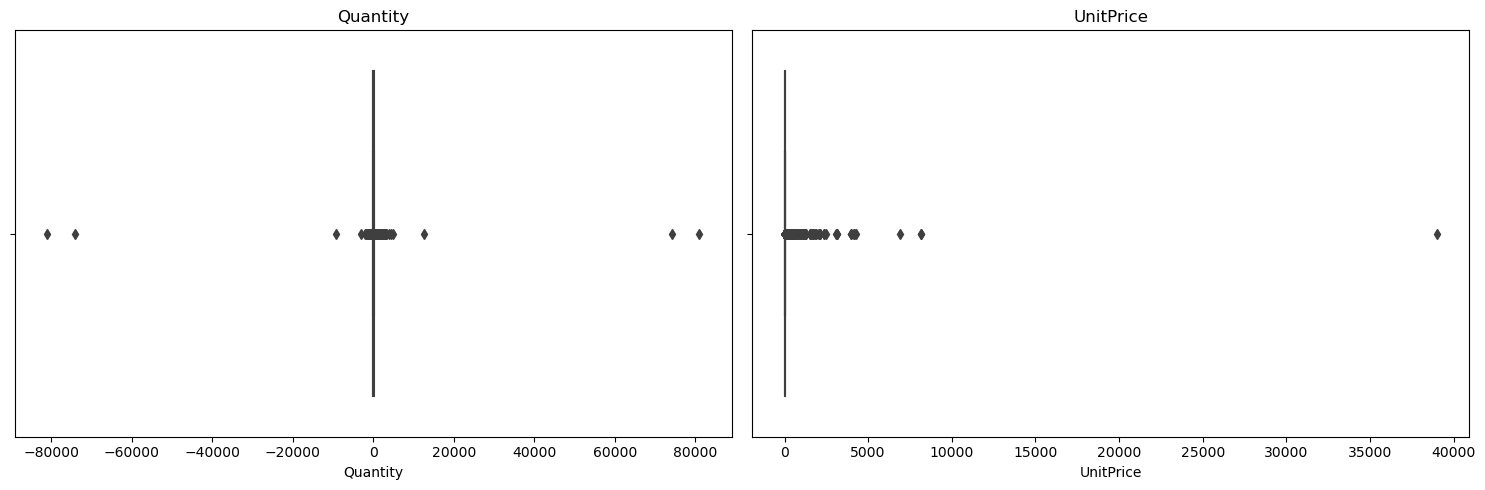

In [85]:
# plot the outliers
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(x=df['Quantity'], ax=ax1)
ax1.set_title('Quantity')

sns.boxplot(x=df['UnitPrice'], ax=ax2)
ax2.set_title('UnitPrice')

plt.tight_layout()
plt.show()

In [86]:
# Clean Quantity - set the max quantity 1000
quantity_lower_threshold = 1
quantity_upper_threshold = 1000  

# Clean UnitPrice - set the max unit price 6000
price_lower_threshold = 1
price_upper_threshold = 6000

# Apply thresholds for Quantity and UnitPrice
df_cleaned = df[
    (df['Quantity'] > quantity_lower_threshold) & 
    (df['Quantity'] <= quantity_upper_threshold) &
    (df['UnitPrice'] >= price_lower_threshold) & 
    (df['UnitPrice'] <= price_upper_threshold)
]


print(f"Original dataset size: {len(df)}")
print(f"Cleaned dataset size: {len(df_cleaned)}")
print(f"Removed {len(df) - len(df_cleaned)} rows")

Original dataset size: 401604
Cleaned dataset size: 241387
Removed 160217 rows


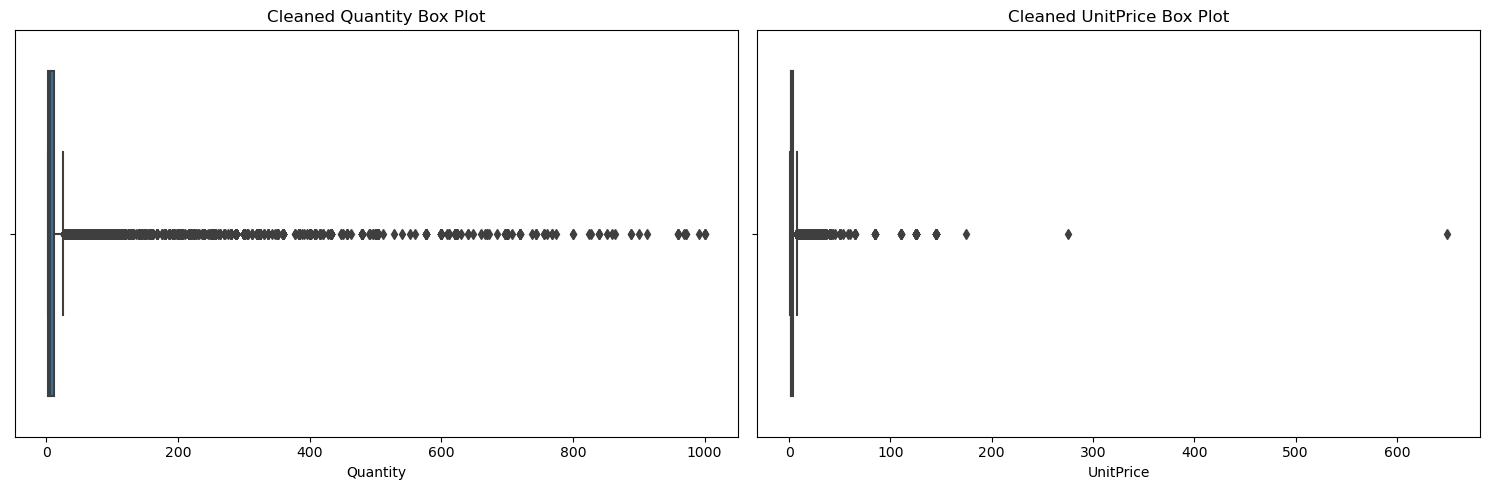

In [87]:
# Visualize the cleaned data - Quantity and UnitPtice - using box plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(x=df_cleaned['Quantity'], ax=ax1)
ax1.set_title('Cleaned Quantity Box Plot')

sns.boxplot(x=df_cleaned['UnitPrice'], ax=ax2)
ax2.set_title('Cleaned UnitPrice Box Plot')

plt.tight_layout()
plt.show()

In [88]:
df_cleaned.info() #Display the summary of the cleaned dataset

<class 'pandas.core.frame.DataFrame'>
Index: 241387 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    241387 non-null  object        
 1   StockCode    241387 non-null  object        
 2   Description  241387 non-null  object        
 3   Quantity     241387 non-null  int64         
 4   InvoiceDate  241387 non-null  datetime64[ns]
 5   UnitPrice    241387 non-null  float64       
 6   CustomerID   241387 non-null  float64       
 7   Country      241387 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 16.6+ MB


In [89]:
df_cleaned.shape

(241387, 8)

In [90]:
df_cleaned.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,241387.000000,241387,241387.000000,241387.000000
mean,11.777726,2011-07-07 08:36:02.917638912,3.337553,15191.445331
min,2.000000,2010-12-01 08:26:00,1.000000,12347.000000
25%,3.000000,2011-04-04 11:18:00,1.650000,13767.000000
50%,6.000000,2011-07-25 12:22:00,2.100000,15039.000000
75%,12.000000,2011-10-17 10:43:00,3.950000,16713.000000
max,1000.000000,2011-12-09 12:50:00,649.500000,18287.000000
std,28.390535,NaN,3.665832,1715.195064


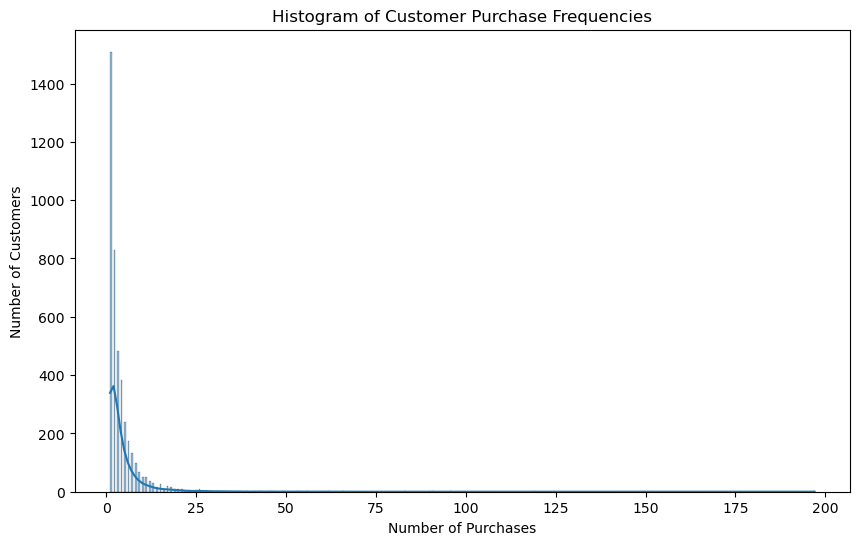

In [91]:
# 1. Histogram of customer purchase frequencies
customer_frequency = df_cleaned.groupby('CustomerID')['InvoiceNo'].nunique()

plt.figure(figsize=(10, 6))
sns.histplot(customer_frequency, kde=True)
plt.title('Histogram of Customer Purchase Frequencies')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.show()

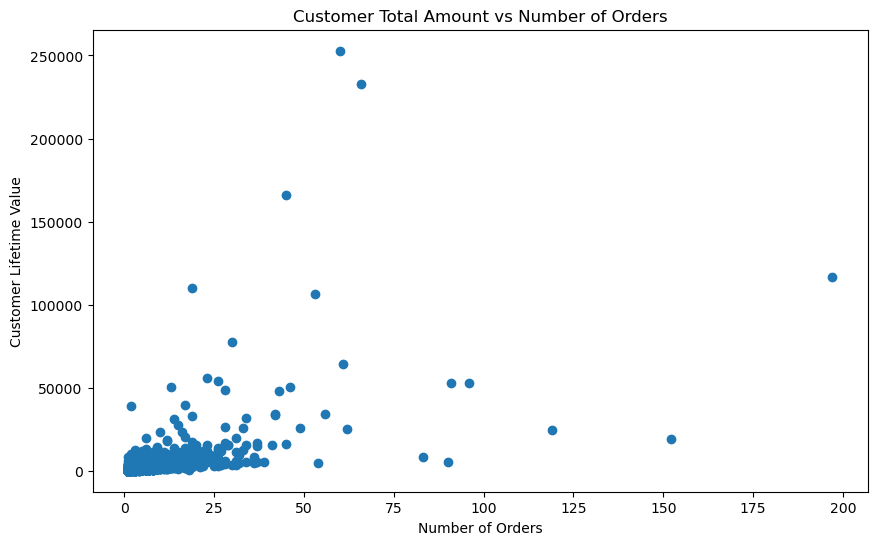

In [92]:
# 2. Scatter plot of customer total amount vs number of orders
customer_orders = df_cleaned.groupby('CustomerID')['InvoiceNo'].nunique()
customer_value = df_cleaned.groupby('CustomerID').apply(lambda x: (x['Quantity'] * x['UnitPrice']).sum())
plt.figure(figsize=(10, 6))
plt.scatter(customer_orders, customer_value)
plt.title('Customer Total Amount vs Number of Orders')
plt.xlabel('Number of Orders')
plt.ylabel('Customer Lifetime Value')
plt.show()

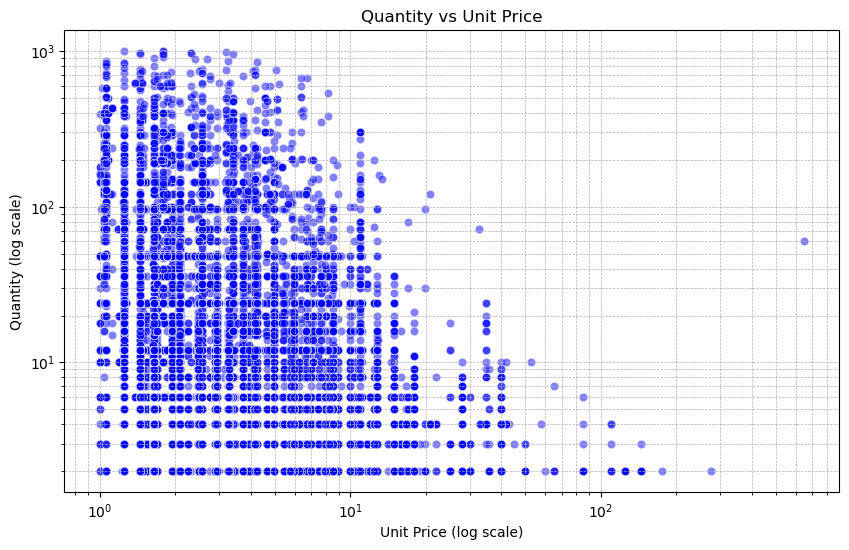

In [93]:
# Quantity vs Unit Price scatter plot - log scale 
plt.figure(figsize=(10, 6))
plt.xscale('log')
plt.yscale('log')
plt.scatter(df_cleaned['UnitPrice'], df_cleaned['Quantity'], alpha=0.5, c='blue', edgecolors='w', linewidth=0.5)
plt.title('Quantity vs Unit Price')
plt.xlabel('Unit Price (log scale)')
plt.ylabel('Quantity (log scale)')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()


Next steps:

Sort customers based on that metric

Break customers into a pre-defined number of groups of equal size

Assign a label to each group

In [94]:
# create a new column - Total (Quantity * UnitPrice)
df_cleaned['Total'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

C:\Users\Yuri\AppData\Local\Temp\ipykernel_8612\3106738628.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Total'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']


In [95]:
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [96]:
# create a new dataframe that will have each unique customer and its total amount spent.
customer = df_cleaned.groupby('CustomerID') ['Total'].sum()

In [97]:
customer = customer.reset_index()

In [98]:
customer.head()

,CustomerID,Total
0,12347.0,3764.48
1,12348.0,994.00
2,12349.0,1303.55
3,12350.0,255.30
4,12352.0,1514.74


In [99]:
# find out how many times a customer has bought using the column InvoiceNo
customer_invoice = df_cleaned.groupby('CustomerID') ['InvoiceNo'].count()

In [100]:
customer_invoice = customer_invoice.reset_index()

In [101]:
customer_invoice.head()

,CustomerID,InvoiceNo
0,12347.0,139
1,12348.0,8
2,12349.0,60
3,12350.0,13
4,12352.0,76


In [102]:
# merging the two dataframes (customer_invoice + customer)
customer_details= pd.merge(customer_invoice,customer, on='CustomerID')

In [103]:
customer_details.head()

,CustomerID,InvoiceNo,Total
0,12347.0,139,3764.48
1,12348.0,8,994.00
2,12349.0,60,1303.55
3,12350.0,13,255.30
4,12352.0,76,1514.74


Now as we need the exact number of days a customer has been last active we will use the InvoiceDate column to find out the most recent date from the InvoiceDate column and then subtract the Maximum date with the Invoice date for each customer which will give us the number of days the customer was last active.

In [104]:
maxDate = max(df_cleaned['InvoiceDate'])

In [105]:
maxDate

Timestamp('2011-12-09 12:50:00')

In [106]:
df_cleaned['Recency'] = maxDate -df_cleaned['InvoiceDate']

C:\Users\Yuri\AppData\Local\Temp\ipykernel_8612\3253239493.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Recency'] = maxDate -df_cleaned['InvoiceDate']


In [107]:
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


Now we can groupby each customer and take out the .min() from the recency column to get the days when the customer was last seen.

In [108]:
date = df_cleaned.groupby('CustomerID')['Recency'].min()

In [109]:
date = date.reset_index()

In [110]:
date['Recency'] = date['Recency'].dt.days

In [111]:
date.head()

,CustomerID,Recency
0,12347.0,1
1,12348.0,74
2,12349.0,18
3,12350.0,309
4,12352.0,35


In [112]:
# merging the data frames (customer_details + date)
customer_details= pd.merge(customer_details,date, on='CustomerID')

In [113]:
customer_details.head()

,CustomerID,InvoiceNo,Total,Recency
0,12347.0,139,3764.48,1
1,12348.0,8,994.00,74
2,12349.0,60,1303.55,18
3,12350.0,13,255.30,309
4,12352.0,76,1514.74,35


In [114]:
#Display basic statistics for each column of customer_details
customer_details.describe() 

,CustomerID,InvoiceNo,Total,Recency
count,4282.000000,4282.000000,4282.000000,4282.000000
mean,15298.348202,56.372489,1662.288585,91.748949
std,1719.117591,119.513943,7490.208340,100.387799
min,12347.000000,1.000000,2.500000,0.000000
25%,13815.250000,11.000000,224.647500,17.000000
50%,15294.000000,26.000000,533.600000,50.000000
75%,16776.750000,62.000000,1338.287500,142.000000
max,18287.000000,4195.000000,252853.880000,373.000000


In [115]:
# Apply Standardisation on the features InvoiceNo, Total and Recency
scaler = StandardScaler()
data_scaler = scaler.fit_transform(customer_details[['InvoiceNo', 'Total', 'Recency']])

In [116]:
data_scaler

array([[ 0.69144368,  0.28069138, -0.90408943],
       [-0.40479075, -0.08923205, -0.1768245 ],
       [ 0.03035574, -0.04789993, -0.73472636],
       ...,
       [-0.41315895, -0.20500336, -0.84431423],
       [ 1.37763622, -0.07514001, -0.88416436],
       [-0.08679908, -0.01978929, -0.49562556]])

In [117]:
# insert the data_scaler array into a new dataframe - Scaled
scaled = pd.DataFrame(data_scaler)

In [118]:
scaled.columns=['InvoiceNo', 'Total', 'Recency']

In [119]:
scaled.head()

,InvoiceNo,Total,Recency
0,0.691444,0.280691,-0.904089
1,-0.404791,-0.089232,-0.176824
2,0.030356,-0.047900,-0.734726
3,-0.362950,-0.187866,2.164371
4,0.164247,-0.019701,-0.565363


### KMEANS - Unsupervised Learning

Now it is time to provide the 'K' value for the algorithm and the number of clusters, but before let's create an elbow graph
to get the best n cluster value

In [120]:
# Create elbow graph to get the best n cluster value
scores = []
for i in range (2,7):
    kmeans = KMeans (n_clusters= i, max_iter=40, verbose = True).fit(scaled)
    scores.append(kmeans.inertia_)

Initialization complete
Iteration 0, inertia 10257.246730278755.
Iteration 1, inertia 9628.039998830272.
Iteration 2, inertia 9320.94500142527.
Iteration 3, inertia 9262.11108724766.
Iteration 4, inertia 9252.958202726384.
Iteration 5, inertia 9250.66402267873.
Iteration 6, inertia 9250.06236069744.
Converged at iteration 6: center shift 1.8537332149826092e-05 within tolerance 9.999999999999979e-05.
Initialization complete
Iteration 0, inertia 6747.415016835624.
Iteration 1, inertia 5879.676496796199.
Iteration 2, inertia 5726.84391228351.
Iteration 3, inertia 5588.579726467513.
Iteration 4, inertia 5367.875173376851.
Iteration 5, inertia 5360.377051874686.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 6761.736573622891.
Iteration 1, inertia 4673.067006355334.
Iteration 2, inertia 4393.416577535408.
Iteration 3, inertia 4341.58177862356.
Iteration 4, inertia 4325.51922387152.
Converged at iteration 4: center shift 5.3203871217329364e-05 with

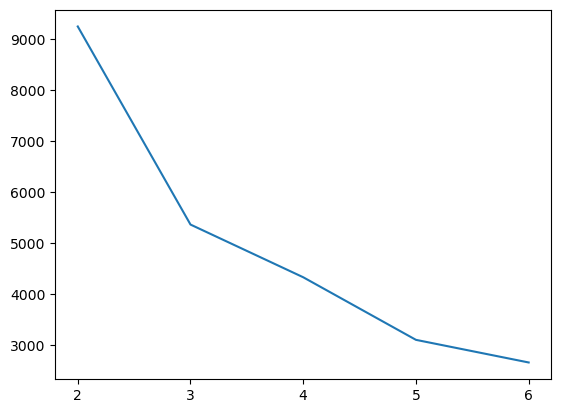

In [121]:
# plot the elbow graph
plt.plot(range(2,7,1), scores)
plt.xticks(ticks = range(2,7))
plt.show()

Now we will calculate the ‘silhouette_score’ for our clusters.

‘The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.’

In [122]:
# Check the silhautte scores
from sklearn.metrics import silhouette_score
for i in range(2,7) :
    kmeans = KMeans (n_clusters = i, max_iter = 40).fit(scaled)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(scaled, cluster_labels)
    print('For N Cluster{} the silhouette scores is {}'.format(i, silhouette_avg))

For N Cluster2 the silhouette scores is 0.5598437708393504
For N Cluster3 the silhouette scores is 0.5827685790230728
For N Cluster4 the silhouette scores is 0.6044141392516983
For N Cluster5 the silhouette scores is 0.6049515801214546
For N Cluster6 the silhouette scores is 0.5090227393987796


From the above elbow graphs and silhouette scores we can take ‘3’ as our k value for number of clusters.

Lets create the final KMeans model

In [123]:
# cluster = 3
# Final Model KMeans

kmeans = KMeans (n_clusters = 3, max_iter = 50).fit(scaled)
clusters = kmeans.labels_

In [124]:
customer_details['Cluster'] = clusters

In [125]:
customer_details

,CustomerID,InvoiceNo,Total,Recency,Cluster
0,12347.0,139,3764.48,1,0
1,12348.0,8,994.00,74,0
2,12349.0,60,1303.55,18,0
3,12350.0,13,255.30,309,1
4,12352.0,76,1514.74,35,0
...,...,...,...,...,...
4277,18280.0,10,180.60,277,1
4278,18281.0,2,31.80,180,1
4279,18282.0,7,126.95,7,0
4280,18283.0,221,1099.54,3,0


Here we have created our final model with 3 clusters and added our cluster labels obtained from ‘kmeans.labels_’ to our Dataframe consisting of Unique customers.



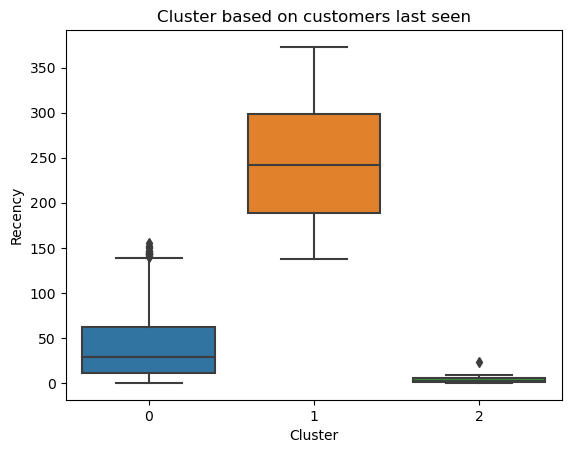

In [126]:
# cluster boxplot based on recency
sns.boxplot (x='Cluster', y= 'Recency', data = customer_details)
plt.title("Cluster based on customers last seen")
plt.show()

F:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


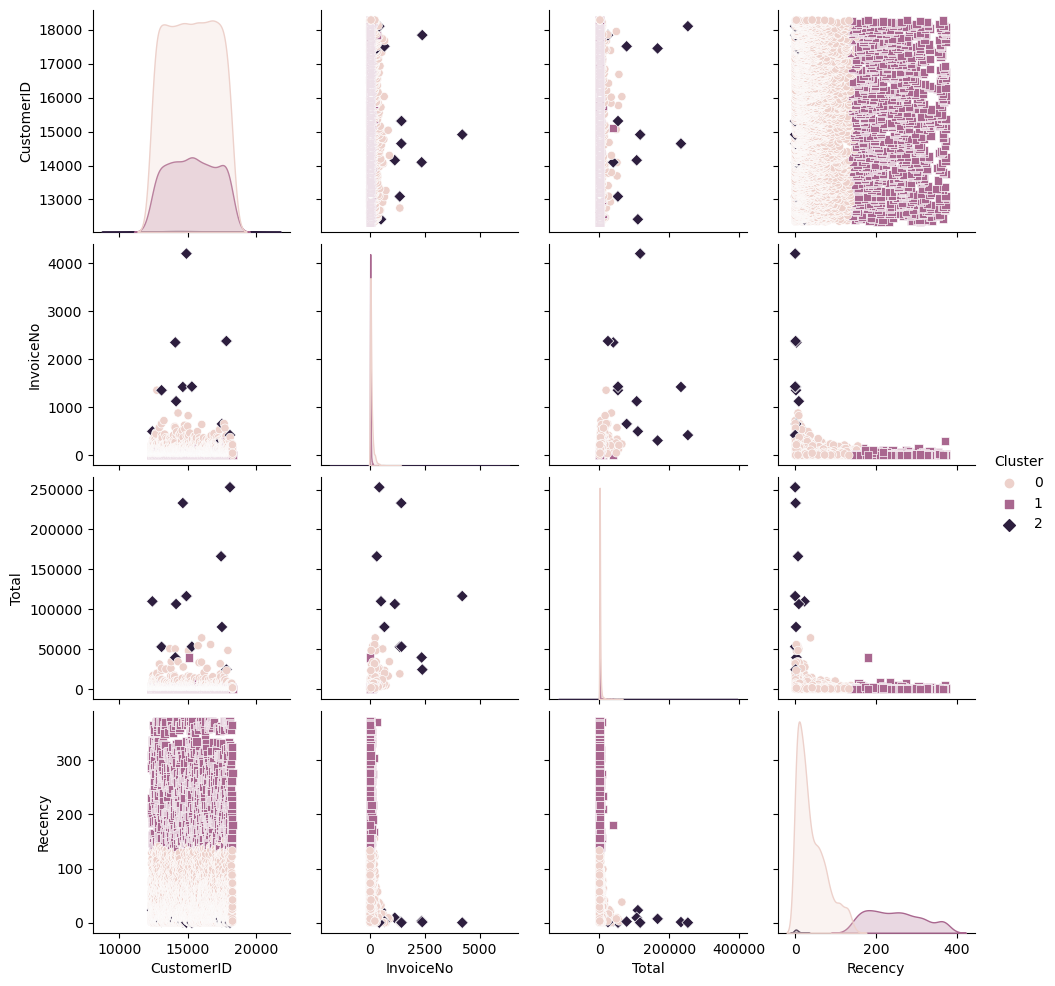

In [127]:
sns.pairplot(customer_details, hue='Cluster', markers=["o", "s", "D"])
plt.show()

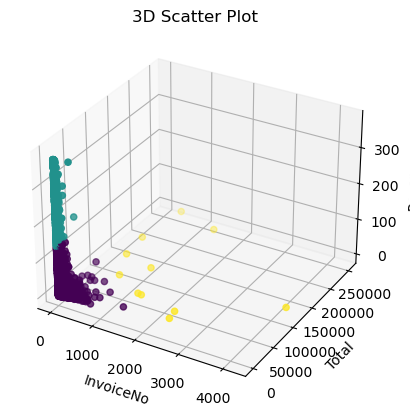

In [128]:
# 3d scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(customer_details['InvoiceNo'], customer_details['Total'], customer_details['Recency'], c=customer_details['Cluster'], cmap='viridis')
ax.set_xlabel('InvoiceNo')
ax.set_ylabel('Total')
ax.set_zlabel('Recency')
ax.set_title('3D Scatter Plot')
plt.show()

### Decision Trees - Supervised Learning - 99.81%

Using the same dataframe I will train a Decision tree algorithm to predict in which cluster a new customer can be added based on their behaivour ( Number of orders, total spent and recency )

In [236]:
#Standardise the features
scaler = StandardScaler()
customerScaled = scaler.fit_transform(customer_details[['InvoiceNo', 'Total', 'Recency']])


In [237]:
customer_details[['InvoiceNo', 'Total', 'Recency']] = customerScaled

In [238]:
customer_details.head()

,CustomerID,InvoiceNo,Total,Recency,Cluster
0,12347.0,0.691444,0.280691,-0.904089,0
1,12348.0,-0.404791,-0.089232,-0.176824,0
2,12349.0,0.030356,-0.047900,-0.734726,0
3,12350.0,-0.362950,-0.187866,2.164371,1
4,12352.0,0.164247,-0.019701,-0.565363,0


In [154]:
X = customer_details[['InvoiceNo', 'Total', 'Recency']]
y = customer_details['Cluster']

In [155]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


In [156]:
# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [157]:
# Predict on the test set
y_pred = clf.predict(X_test)

In [158]:
# Evaluate the model - 99.63%
accuracy = clf.score(X_test, y_test)
print(f" Decision Tree Accuracy: {accuracy}")

 Decision Tree Accuracy: 0.9981325863678805


In [159]:
# predictions
prediction_tree = clf.predict(X_test)
prediction_tree

array([1, 0, 0, ..., 1, 0, 1])

In [245]:
y_test.array

<PandasArray>
[1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
 ...
 1, 1, 0, 1, 0, 0, 0, 1, 0, 1]
Length: 1071, dtype: int32

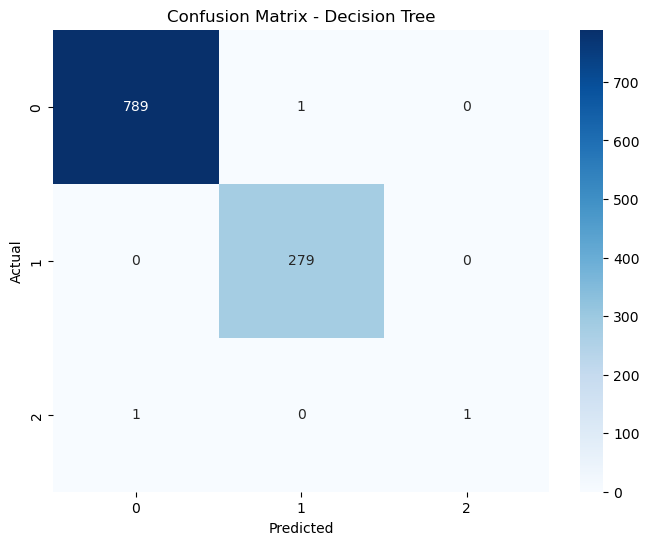

In [246]:
cm = confusion_matrix(y_test, prediction_tree)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

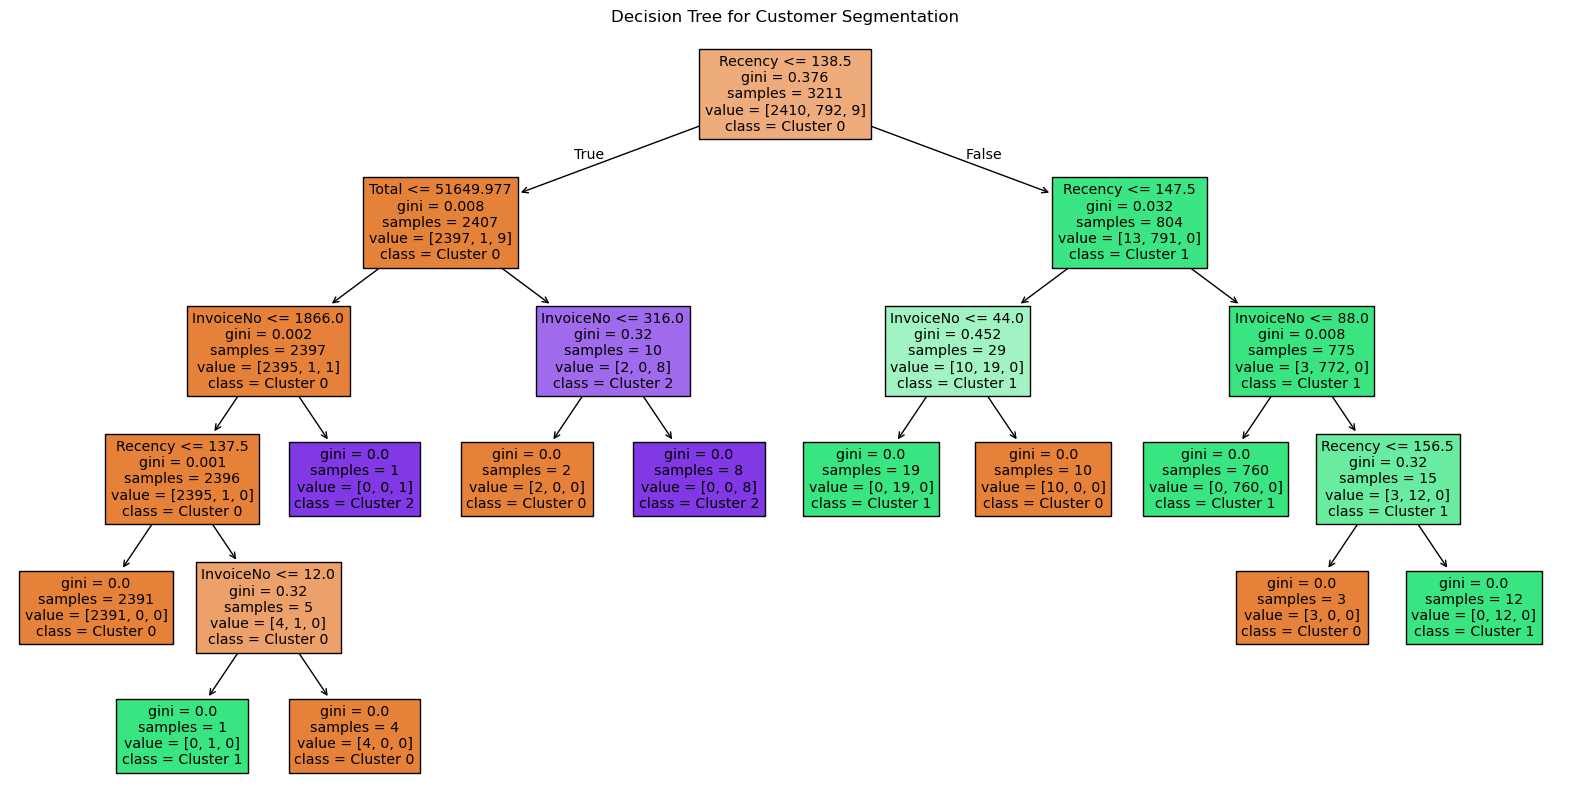

In [160]:
# Visualize the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=['InvoiceNo', 'Total', 'Recency'], class_names=['Cluster 0', 'Cluster 1', 'Cluster 2'], filled=True)
plt.title("Decision Tree for Customer Segmentation")
plt.show()

Cross-validation scores - Decision Tree: [0.99416569 0.99883314 0.99649533 0.9953271  0.99182243]


### Random Forest - Supervised Learning - 99.81%

Now let's train and evalute a Random Forest to compare the results with the Decision Tree.

In [129]:
X = customer_details[['InvoiceNo', 'Total', 'Recency']]
y = customer_details['Cluster']

In [149]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


In [150]:
# Train a Random Forest Classifier
# Compare the results - 10 trees = 99.81%, 100 trees = 99.71% 
rf_clf = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state = 0)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [151]:
# Predict on the test set
y_pred = rf_clf.predict(X_test)

In [152]:
# Evaluate the model - 99.81%
accuracy = rf_clf.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9981325863678805


In [274]:
# predictions
prediction_random = rf_clf.predict(X_test)
prediction_random

array([1, 0, 0, ..., 1, 0, 1])

In [275]:
y_test.array

<PandasArray>
[1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
 ...
 1, 1, 0, 1, 0, 0, 0, 1, 0, 1]
Length: 1071, dtype: int32

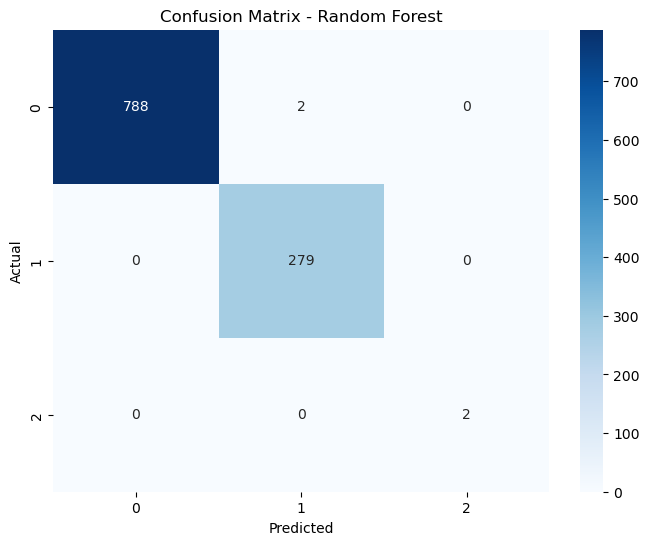

In [276]:
# Generate and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

### Cross Validation - Decision Tree and Random Forest 

We use cross_val_score to perform 5-fold cross-validation. This function:


Splits the data into 5 parts

Trains the model on 4 parts and tests it on the 5th part

Repeats this process 5 times, each time using a different part as the test set

Returns the accuracy score for each of the 5 folds

In [166]:
# Perform 5-fold cross-validation - Decision Tree
cv_scores1 = cross_val_score(clf, X, y, cv=5, scoring='accuracy') # using 5 cross validation

# Print the cross-validation scores
print("Cross-validation scores - Decision Tree:", cv_scores1)

Cross-validation scores - Decision Tree: [0.99416569 0.99883314 0.99649533 0.9953271  0.99182243]


In [167]:
# Perform 5-fold cross-validation
cv_scores2 = cross_val_score(rf_clf, X, y, cv=5, scoring='accuracy') # using 5 cross validation
# Print the cross-validation scores
print("Cross-validation scores:", cv_scores2)

Cross-validation scores: [0.99416569 0.99883314 0.99766355 0.9953271  0.99299065]


# REFERENCES

Detect and Remove the Outliers using Python. (2024, Jan 24). Retrieved from Geeks for Geeks: https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/

Inferential Statistical Analysis Using Python. (n.d.). Retrieved from Brainalyst Academy: https://brainalystacademy.com/inferential-statistics-in-python/#T-Test

pandas.DataFrame.describe. (n.d.). Retrieved from Pandas: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

Statistical functions. (n.d.). Retrieved from SciPy: https://docs.scipy.org/doc/scipy/reference/stats.html

Cross Val Score. (n.d.). Retrieved from Scikit Learn: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

Decision Trees. (n.d.). Retrieved from Scikit Learn: https://scikit-learn.org/stable/modules/tree.html

KMeans. (n.d.). Retrieved from Scikit Learn: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

Log Plot Python. (n.d.). Retrieved from Vaia: https://www.vaia.com/en-us/explanations/computer-science/computer-programming/log-plot-python/

Random Forest Classifier. (n.d.). Retrieved from Scikit Learn: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

StandardScaler. (n.d.). Retrieved from Scikit Learn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

